# DESCRIPTION

- 목적: 후보자별 공약 데이터 가져오기
- 코드정보, 후보자정보를 거쳐야 선거공약 데이터 추출 가능
- 활용할 데이터셋 / 가져올 정보:
    1. 공공데이터 '코드정보' / 선거아이디, 선거명 ->
    2. 공공데이터 '후보자정보' / 후보아이디, 선거종류코드 ->
    3. 공공데이터 '선거공약' / 선거공약

## 코드정보 공공데이터 불러오기

In [1]:
from urllib.request import Request,urlopen
from urllib.parse import urlencode,quote_plus
import pandas as pd
import json

skey = 'EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
resultType = 'json'
pageNo = '1'
numOfRows = '100'

url = 'http://apis.data.go.kr/9760000/CommonCodeService/getCommonSgCodeList'
params = f'?&numOfRows={numOfRows}&resultType={resultType}&serviceKey={skey}&pageNo={pageNo}'
query = url + params
#print(query)

request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
response_dict
items = response_dict['getCommonSgCodeList']['item']

df = pd.DataFrame(items)
df

NUM     SG_ID      SG_NAME SG_TYPECODE SG_VOTEDATE
0    1  20021219   제16대 대통령선거           0    20021219
1    2  20021219        대통령선거           1    20021219
2    3  20040415  제17대 국회의원선거           0    20040415
3    4  20040415       국회의원선거           2    20040415
4    5  20040415   비례대표국회의원선거           7    20040415
..  ..       ...          ...         ...         ...
75  76  20220601  구·시·군의회의원선거           6    20220601
76  77  20220601   광역의원비례대표선거           8    20220601
77  78  20220601   기초의원비례대표선거           9    20220601
78  79  20220601       교육의원선거          10    20220601
79  80  20220601        교육감선거          11    20220601

[80 rows x 5 columns]

### 선거별 아이디=날짜 파악 
- 21대 국회의원 선출 년도 추출 : 21.04.07~22.06.01

In [3]:
df['SG_ID'].unique()

array(['20021219', '20040415', '20071219', '20080409', '20100602',
       '20120411', '20121219', '20140604', '20160413', '20170509',
       '20180613', '20190403', '20200415', '20210407', '20220309',
       '20220601'], dtype=object)

In [4]:
df1 = df.loc[df['SG_ID']=='20210407',:]
df1

NUM     SG_ID       SG_NAME SG_TYPECODE SG_VOTEDATE
62  63  20210407  2021년 재·보궐선거           0    20210407
63  64  20210407       시·도지사선거           3    20210407
64  65  20210407    구·시·군의 장선거           4    20210407
65  66  20210407     시·도의회의원선거           5    20210407
66  67  20210407   구·시·군의회의원선거           6    20210407

In [5]:
df2 = df.loc[df['SG_ID']=='20220309',:]
df2

NUM     SG_ID     SG_NAME SG_TYPECODE SG_VOTEDATE
67  68  20220309  제20대 대통령선거           0    20220309
68  69  20220309       대통령선거           1    20220309
69  70  20220309      국회의원선거           2    20220309

In [6]:
df3 = df.loc[df['SG_ID']=='20220601',:]
df3

NUM     SG_ID       SG_NAME SG_TYPECODE SG_VOTEDATE
70  71  20220601  제8회 전국동시지방선거           0    20220601
71  72  20220601        국회의원선거           2    20220601
72  73  20220601       시·도지사선거           3    20220601
73  74  20220601    구·시·군의 장선거           4    20220601
74  75  20220601     시·도의회의원선거           5    20220601
75  76  20220601   구·시·군의회의원선거           6    20220601
76  77  20220601    광역의원비례대표선거           8    20220601
77  78  20220601    기초의원비례대표선거           9    20220601
78  79  20220601        교육의원선거          10    20220601
79  80  20220601         교육감선거          11    20220601

### 사용할 선거아이디(SG_ID, SG_VOTEDATE) = '20210407','20220309','20220601'

## x당선인 정보 활용x

In [7]:
from urllib.request import Request,urlopen
import urllib.request
from urllib.parse import urlencode,quote_plus
import pandas as pd
import json

skey ='EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
resultType = 'json'
sgId='20220601'
sgTypecode='3'
 
    #선거공약서 제출코드(SgTypecode) : 3(시∙도시자선거),4(구∙시∙군의장선거)

#pageNo ='1'
#numOfRows ='100'

url = 'http://apis.data.go.kr/9760000/WinnerInfoInqireService2/getWinnerInfoInqire'
params = f'?resultType={resultType}&serviceKey={skey}&sgId={sgId}&sgTypecode={sgTypecode}'
query = url + params
#print(query)

request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
response_dict
items = response_dict['getWinnerInfoInqire']['item']

df = pd.DataFrame(items)
df

NUM     SG_ID SG_TYPECODE     HUBOID SGG_NAME SD_NAME WIW_NAME GIHO  \
0   1  20220601           3  100149260    서울특별시   서울특별시             2   
1   2  20220601           3  100149514    부산광역시   부산광역시             2   
2   3  20220601           3  100147274    대구광역시   대구광역시             2   
3   4  20220601           3  100139645    인천광역시   인천광역시             2   
4   5  20220601           3  100140244    광주광역시   광주광역시             1   
5   6  20220601           3  100139063    대전광역시   대전광역시             2   
6   7  20220601           3  100139025    울산광역시   울산광역시             2   
7   8  20220601           3  100145752      경기도     경기도             1   
8   9  20220601           3  100141401      강원도     강원도             2   
9  10  20220601           3  100143970     충청북도    충청북도             2   

  GIHO_SANGSE JD_NAME  ... AGE                  ADDR JOB_ID     JOB EDU_ID  \
0                국민의힘  ...  61       서울특별시 광진구 능동로4길     73  서울특별시장    221   
1                국민의힘  ...  62   부산광역시 해운대구 달맞이길65번길     73  부산광역시장    221   
2                국민의힘  ...  67         대구광역시 수성구 수성로     75     정치인     68   
3                국민의힘  ...  64         인천광역시 남동구 논현로     75     정당인     69   
4              더불어민주당  ...  57          광주광역시 북구 대천로     75     정당인    221   
5                국민의힘  ...  57          대전광역시 동구 용운로     75     정당인    221   
6                국민의힘  ...  64       울산광역시 남구 북부순환도로     75     정당인    221   
7              더불어민주당  ...  65   경기도 수원시 영통구 도청로18번길     75     정당인    221   
8                국민의힘  ...  57     강원도 춘천시 동내면 춘천순환로     75     정당인     68   
9                국민의힘  ...  67  충청북도 괴산군 청천면 도경로후영6길     75     정당인    221   

                                            EDU                    CAREER1  \
0                          고려대학교 법학대학원 졸업(법학박사)             (현)제38대 서울특별시장   
1                  고려대학교 대학원 사회학과 박사과정 졸업(문학박사)                  (전)국회사무총장   
2                            고려대학교 법과대학 행정학과 졸업  (전) 제15,16,17,18,21대 국회의원   
3                        연세대학교 대학원 정치학과 박사과정 수료                  (전)인천광역시장   
4                        전남대학교 행정대학원 졸업(행정학 석사)                (전)청와대 정무수석   
5                     대전대학교 대학원 행정학과 졸업(행정학 박사)     (전)제19,20대 국회의원(대전 동구)   
6                         울산대학교 일반대학원 졸업(행정학박사)     (전)울산광역시 남구청장(민선 3,4대)   
7  미국 미시간대학교 대학원 졸업(정책학박사, 1989. 9. ~ 1993. 6.)       (전) 경제부총리 겸 기획재정부 장관   
8                            서울대학교 법과대학 공법학과 졸업            (전)19, 20대 국회의원   
9                         연세대학교 경제대학원 졸업(경제학석사)          (전)윤석열대통령당선인 특별고문   

                    CAREER2    DUGSU DUGYUL  
0              (전)제16대 국회의원  2608277  59.05  
1                 (현)부산광역시장   938601  66.36  
2  (전) 제20대 대통령선거 국민의힘 경선후보   685159  78.75  
3                (전)행정안전부장관   634250  51.76  
4  (전)3선 국회의원(제17, 18, 19대)   334699  74.91  
5        (전)윤석열 국민캠프 조직1본부장   310035  51.19  
6          (전)울산광역시 남구의회 의장   290563  59.78  
7              (전) 아주대학교 총장  2827593  49.06  
8             (전)춘천지검 원주지청장   409461  54.07  
9                (전)과학기술부장관   395517  58.19  

[10 rows x 24 columns]

#### 당선인 정보에 비례대표 등 모든 후보자가 나타나지 않음. 누락 인원이 발생해 후보자 정보에서 찾는 방향으로 전환.

## 후보자 정보

In [8]:
from urllib.request import Request,urlopen
from urllib.parse import urlencode,quote_plus
import pandas as pd
import json


skey ='EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
#skey ='EbwPIaTQ+n53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS+LvYw4mTX2ytwazyZbfe6SzIXv3YZKA=='

resultType = 'json'
sgId='20220601'
sgTypecode='3'

url = 'http://apis.data.go.kr/9760000/PofelcddInfoInqireService/getPofelcddRegistSttusInfoInqire'
params = f'?sgId={sgId}&sgTypecode={sgTypecode}&resultType={resultType}&serviceKey={skey}'
query = url + params
#print(query)

request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
response_dict
items = response_dict['getPofelcddRegistSttusInfoInqire']['item']

df = pd.DataFrame(items)
df

NUM     SG_ID SG_TYPECODE     HUBOID SGG_NAME SD_NAME WIW_NAME GIHO  \
0   1  20220601           3  100147796    서울특별시   서울특별시             1   
1   2  20220601           3  100149260    서울특별시   서울특별시             2   
2   3  20220601           3  100138891    서울특별시   서울특별시             3   
3   4  20220601           3  100144119    서울특별시   서울특별시             4   
4   5  20220601           3  100138508    서울특별시   서울특별시             5   
5   6  20220601           3  100146196    부산광역시   부산광역시             1   
6   7  20220601           3  100149514    부산광역시   부산광역시             2   
7   8  20220601           3  100139837    부산광역시   부산광역시             3   
8   9  20220601           3  100143589    대구광역시   대구광역시             1   
9  10  20220601           3  100147274    대구광역시   대구광역시             2   

  GIHO_SANGSE JD_NAME  ...  BIRTHDAY AGE                 ADDR JOB_ID     JOB  \
0              더불어민주당  ...  19630321  59      서울특별시 송파구 거마로3길     85     변호사   
1                국민의힘  ...  19610104  61      서울특별시 광진구 능동로4길     73  서울특별시장   
2                 정의당  ...  19730830  48    서울특별시 강서구 강서로56나길     74   서울시의원   
3               기본소득당  ...  19871022  34     서울특별시 은평구 통일로72길     75     정당인   
4                 무소속  ...  19620725  59     서울특별시 강남구 광평로47길     75     정치인   
5              더불어민주당  ...  19650716  56     부산광역시 해운대구 좌동순환로     75     정당인   
6                국민의힘  ...  19600119  62  부산광역시 해운대구 달맞이길65번길     73  부산광역시장   
7                 정의당  ...  19621016  59      부산광역시 영도구 해안산책길     87     회사원   
8              더불어민주당  ...  19790425  43        대구광역시 동구 율하동로     75     정당인   
9                국민의힘  ...  19541205  67        대구광역시 수성구 수성로     75     정치인   

  EDU_ID                                               EDU  \
0     68                                연세대학교 상경대학 경영학과 졸업   
1    221                              고려대학교 법학대학원 졸업(법학박사)   
2     68                                     충남대학교 물리학과 졸업   
3     68                       이화여자대학교 사회학과 졸업(복수전공 : 여성학)   
4     68                                     서울대학교 외교학과 졸업   
5     68                                고려대학교 정경대학 행정학과 졸업   
6    221                      고려대학교 대학원 사회학과 박사과정 졸업(문학박사)   
7     65                                   부산공업고등학교 기계과 졸업   
8    221  영국스트래스클라이드대학교 MBA(경영학 석사)졸업 (2016.9. ~ 2017.11.)   
9     68                                고려대학교 법과대학 행정학과 졸업   

                        CAREER1                   CAREER2 STATUS  
0                  (전)더불어민주당 대표               (전)국회의원(5선)     등록  
1                (현)제38대 서울특별시장              (전)제16대 국회의원     등록  
2                      (현)서울시의원        (전)아시아나항공 노동조합 위원장     등록  
3        (전)2021 서울특별시장 보궐선거 후보             (현)기본소득당 상임대표     등록  
4            (현)아리랑당 창당추진위원회 대표        (전)아리랑당 창당준비위원회 대표     등록  
5               (전)노무현대통령 의전행정관          (전)부산광역시 시장 권한대행     등록  
6                     (전)국회사무총장                 (현)부산광역시장     등록  
7            (현) 정의당 부산광역시당 위원장       (전) 민주노총 부산지역본부 본부장     등록  
8  (전)경기신용보증재단 경영기획본부장(별정직1급대우)    (전)더불어민주당 대구 동구갑 지역위원장     등록  
9     (전) 제15,16,17,18,21대 국회의원  (전) 제20대 대통령선거 국민의힘 경선후보     등록  

[10 rows x 23 columns]

In [9]:
from urllib.request import Request,urlopen
from urllib.parse import urlencode,quote_plus
import pandas as pd
import json


skey ='EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
#skey ='EbwPIaTQ+n53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS+LvYw4mTX2ytwazyZbfe6SzIXv3YZKA=='

resultType = 'json'
sgId='20220309'
sgTypecode='1'

url = 'http://apis.data.go.kr/9760000/PofelcddInfoInqireService/getPofelcddRegistSttusInfoInqire'
params = f'?sgId={sgId}&sgTypecode={sgTypecode}&resultType={resultType}&serviceKey={skey}'
query = url + params
#print(query)

request = Request(query)
request.get_method = lambda:'GET'
response_body = urlopen(request).read()
#print(response_body)

response_dict = json.loads(response_body.decode('utf-8'))
response_dict
items = response_dict['getPofelcddRegistSttusInfoInqire']['item']

df = pd.DataFrame(items)
df[['SG_ID','SG_TYPECODE','HUBOID']]

SG_ID SG_TYPECODE     HUBOID
0  20220309           1  100138381
1  20220309           1  100138362
2  20220309           1  100138383
3  20220309           1  100138392
4  20220309           1  100138395
5  20220309           1  100138378
6  20220309           1  100138411
7  20220309           1  100138489
8  20220309           1  100138373
9  20220309           1  100138380

## 후보자정보 조건에 맞는 데이터프레임 만들기

In [1]:
from urllib.request import Request,urlopen
from urllib.parse import urlencode,quote_plus
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
from pandas.io.json import json_normalize

In [14]:
hubo_df = pd.DataFrame(columns=['SG_ID','SG_TYPECODE','HUBOID'])
hubo_df

Empty DataFrame
Columns: [SG_ID, SG_TYPECODE, HUBOID]
Index: []

In [15]:
sgIds = [20210407,20220309,20220601] # 21대 국회의원 선거 날짜 기준 리스트
sgTypecodes = [2,3,4,5,6,7,8,9] # 국회의원 (당선, 비례대표) 선거 유형 리스트

for sgId in sgIds:
    for sgTypecode in sgTypecodes:
            skey = 'EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
            resultType = 'json'
            
            url = 'http://apis.data.go.kr/9760000/PofelcddInfoInqireService/getPofelcddRegistSttusInfoInqire'
            params = '?sgId='+str(sgId)+'&sgTypecode='+str(sgTypecode)+'&resultType='+resultType+'&serviceKey='+skey
            query = url + params
            #print(query)
            
            request = Request(query)
            #print(request)
            
            request.get_method = lambda:'GET'
            
            response_body = urlopen(request).read()
            #print(response_body)

            try:
                response_dict = json.loads(response_body.decode('utf-8'))
                #print(response_dict)

                items = response_dict['getPofelcddRegistSttusInfoInqire']['item']

                df = pd.DataFrame(items)   
                df = df[['SG_ID','SG_TYPECODE','HUBOID']] # 다음에 쓸 '선거공약'api의 필수키만 추출
                
                hubo_df =  pd.concat([hubo_df,df], ignore_index=True,sort=False,axis=0)
            except:
                print(' ')
                

hubo_df

SG_ID SG_TYPECODE     HUBOID
0    20210407           3  100138295
1    20210407           3  100138272
2    20210407           3  100138291
3    20210407           3  100138218
4    20210407           3  100138226
..        ...         ...        ...
112  20220601           9  100149341
113  20220601           9  100149942
114  20220601           9  100149920
115  20220601           9  100149205
116  20220601           9  100149604

[117 rows x 3 columns]

### 선거공약 조회에 필요한 후보아이디 추출

In [26]:
HUBOID = list(hubo_df.HUBOID)
HUBOID = str(HUBOID)
HUBOID

"['100138295', '100138272', '100138291', '100138218', '100138226', '100138327', '100138336', '100138235', '100138321', '100138267', '100138299', '100138285', '100138240', '100138278', '100138274', '100138304', '100138292', '100138343', '100138234', '100138243', '100138252', '100138254', '100138266', '100138251', '100138346', '100138290', '100138246', '100138340', '100138245', '100138341', '100138334', '100138330', '100138355', '100138329', '100138255', '100138318', '100138249', '100138535', '100138425', '100138482', '100138408', '100138545', '100138536', '100138534', '100138522', '100138542', '100138537', '100149874', '100150313', '100150092', '100148344', '100148724', '100148608', '100148313', '100148229', '100148332', '100148212', '100147796', '100149260', '100138891', '100144119', '100138508', '100146196', '100149514', '100139837', '100143589', '100147274', '100142311', '100147847', '100138578', '100139558', '100147083', '100143217', '100142623', '100138685', '100138874', '100148289

# 선거공약

In [ ]:
sgIds = [20210407,20220309,20220601]
sgTypecodes = [2,3,4,5,6,7,8,9]
# cnddtIds :'후보자'api에서 추출한 후보자 키 리스트
cnddtIds = ['100138295', '100138272', '100138291', '100138218', '100138226', '100138327', '100138336', '100138235', '100138321', '100138267', '100138299', '100138285', '100138240', '100138278', '100138274', '100138304', '100138292', '100138343', '100138234', '100138243', '100138252', '100138254', '100138266', '100138251', '100138346', '100138290', '100138246', '100138340', '100138245', '100138341', '100138334', '100138330', '100138355', '100138329', '100138255', '100138318', '100138249', '100138535', '100138425', '100138482', '100138408', '100138545', '100138536', '100138534', '100138522', '100138542', '100138537', '100149874', '100150313', '100150092', '100148344', '100148724', '100148608', '100148313', '100148229', '100148332', '100148212', '100147796', '100149260', '100138891', '100144119', '100138508', '100146196', '100149514', '100139837', '100143589', '100147274', '100142311', '100147847', '100138578', '100139558', '100147083', '100143217', '100142623', '100138685', '100138874', '100148289', '100144350', '100148176', '100146182', '100146018', '100146134', '100146621', '100146484', '100145921', '100146989', '100144216', '100145851', '100146179', '100143807', '100145741', '100146224', '100142595', '100142393', '100146417', '100145794', '100145140', '100149458', '100150016', '100149785', '100150335', '100150022', '100150334', '100150593', '100149754', '100150333', '100149459', '100149105', '100148868', '100149410', '100149409', '100149330', '100149341', '100149942', '100149920', '100149205', '100149604']

for sgId in sgIds:
    for sgTypecode in sgTypecodes:
        for cnddtId in cnddtIds:
            skey = 'EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
            resultType = 'json'
            
            url = 'http://apis.data.go.kr/9760000/ElecPrmsInfoInqireService/getCnddtElecPrmsInfoInqire'
            params = '?sgId='+str(sgId)+'&cnddtId='+str(cnddtId)+'&sgTypecode='+str(sgTypecode)+'&resultType='+resultType+'&serviceKey='+skey
            query = url + params
            #print(query)
            
            try:
                request = Request(query)
                #print(request)

                request.get_method = lambda:'GET'

                response_body = urlopen(request).read()
                #print(response_body)

                try:
                    response_dict = json.loads(response_body.decode('utf-8'))
                    print(response_dict)

                    items = response_dict['getCnddtElecPrmsInfoInqire']['item']
                    print(items)
                    df = pd.DataFrame(items)
                    #df = df[['SG_ID','partyName','krName','prmsCnt','']]

                    MP_df =  pd.concat([MP_df,df], ignore_index=True,sort=False,axis=0)
                except:
                    print(' ')
            except:
                print(' ')


MP_df

## !전체를 대상으로 공약을 추출하려니 용량 초과

### 예시를 보여드리겠습니다

## 해당 정치인의 선거 공약 주제를 한눈에 보고싶다면?

In [112]:
# 선거 공약 타이틀 추출 함수
import re

def prmsTitle():
    li = []
    prmsCnt = int(MP_df['prmsCnt'].values)

    for i in range(prmsCnt):
        i+=1
        prmsTitle = MP_df['prmsTitle'+str(i)][0]
        li.append(prmsTitle)
    return(li)

prmsTitle()

['스피드 주택공급', '스피드 교통', '균형발전 서울', '1인가구 안심특별대책본부 설치', '청춘이 밥 먹여준다!']

## 해당 정치인의 공약 내용을 자세히 보고싶다면? ->워드클라우드 활용!

In [1]:
from urllib.request import Request,urlopen
from urllib.parse import urlencode,quote_plus
import pandas as pd
import json
from bs4 import BeautifulSoup
import requests
from pandas.io.json import json_normalize

In [6]:
MP_df = pd.DataFrame()
MP_df

Empty DataFrame
Columns: []
Index: []

### 첫번째 공약 내용 확인해보아요

In [7]:
sgIds = [20210407,20220309,20220601]
sgTypecodes = [2,3,4,5,6,7,8,9]
cnddtIds = ['100138272'] #위의 후보자키 리스트 중 하나 정해서 입력

for sgId in sgIds:
    for sgTypecode in sgTypecodes:
        for cnddtId in cnddtIds:
            skey = 'EbwPIaTQ%2Bn53RTCBMoZUvZYQ6Md6hF85t6GkF1SQn4IQbT8lXzCKZPS%2BLvYw4mTX2ytwazyZbfe6SzIXv3YZKA%3D%3D'
            resultType = 'json'
            
            url = 'http://apis.data.go.kr/9760000/ElecPrmsInfoInqireService/getCnddtElecPrmsInfoInqire'
            params = '?sgId='+str(sgId)+'&cnddtId='+str(cnddtId)+'&sgTypecode='+str(sgTypecode)+'&resultType='+resultType+'&serviceKey='+skey
            query = url + params
            #print(query)
            
            try:
                request = Request(query)
                #print(request)

                request.get_method = lambda:'GET'

                response_body = urlopen(request).read()
                #print(response_body)

                try:
                    response_dict = json.loads(response_body.decode('utf-8'))
                    #print(response_dict)

                    items = response_dict['getCnddtElecPrmsInfoInqire']['item'] #헤더가 아닌 본문 내용 추출
                    print(items)
                    MP_df =  pd.concat([MP_df,df], ignore_index=True,sort=False,axis=0)
                except:
                    print(' ')
            except:
                print(' ')


MP_df['prmmCont1'] # prmmCont1 = 첫번째 공약 내용

 
[{'num': '1', 'sgId': '20210407', 'sgTypecode': '3', 'cnddtId': '100138272', 'sggName': '서울특별시', 'sidoName': '서울특별시', 'wiwName': '', 'partyName': '국민의힘', 'krName': '오세훈', 'cnName': '吳世勳', 'prmsCnt': '5', 'prmsOrd1': '1', 'prmsRealmName1': '', 'prmsTitle1': '스피드 주택공급', 'prmmCont1': '□ 목 표\n  ○ 주택공급 활성화로 부동산 시장 안정화\n \n□ 이행방법\n  ○ 1년내 서울시 도시계획규제 혁파 \n    - 서울시 용적률 규제완화(주거지역 용적률 및 2종일반 7층이하 규제)\n    - 한강변아파트 35층이하 규제 등 서울시 내부에만 존재하는 방침성격 규제 폐지\n    - 서울시 조직개편: 주택공급확대를 위한 서울시 위원회 및 조직개편\n    - 비강남권의 상업지역 확대, 준공업지역 축소 및 규제완화\n  ○ 재개발, 재건축 정상화로 18.5만호 추진동력 확보\n    - 구역지정 기준완화를 통해 재지정 촉진 (연간 2만호 × 5년 = 10만호)\n    - 재개발은 2015년, 재건축은 2018년부터 신규지정 중단. 정비지수제 폐지를 통해 노후주거지의 신규구역지정 활성화 (연간 0.7만호 × 5년 = 3.5만호)\n    - 용적률 및 층수규제 완화를 통해 일반분양물량 확보를 통한 사업성 개선 (연간 1만호 × 5년 = 5만호)\n  ○ 도심형타운하우스 모아주택 도입으로 3만호 공급\n    - 소규모 필지의 소유자끼리 공동개발을 할 수 있도록 일정규모 이상 (500㎡~3,000㎡)이면 용적률 인센티브를 부여하는 소형재건축사업\n  ○ 장기전세주택 시즌Ⅱ, 상생주택으로 7만호 공급\n    - 준공업지역, 자연녹지지역, 역세권 등 서울시내에 저이용되고 있는 민간소유 토지를 임차하여 토지임대료를 지불하고 주택은 SH공사 등 공공에

0    □ 목 표\n  ○ 주택공급 활성화로 부동산 시장 안정화\n \n□ 이행방법\n  ...
Name: prmmCont1, dtype: object

### 첫번째 공약 내용 대상으로 워드클라우드 만들기

In [8]:
# 1. 첫번째 공약 내용 추출

MP_df_content=[]
MP_df_content = MP_df.prmmCont1.values.tolist()
MP_df_content

['□ 목 표\n  ○ 주택공급 활성화로 부동산 시장 안정화\n \n□ 이행방법\n  ○ 1년내 서울시 도시계획규제 혁파 \n    - 서울시 용적률 규제완화(주거지역 용적률 및 2종일반 7층이하 규제)\n    - 한강변아파트 35층이하 규제 등 서울시 내부에만 존재하는 방침성격 규제 폐지\n    - 서울시 조직개편: 주택공급확대를 위한 서울시 위원회 및 조직개편\n    - 비강남권의 상업지역 확대, 준공업지역 축소 및 규제완화\n  ○ 재개발, 재건축 정상화로 18.5만호 추진동력 확보\n    - 구역지정 기준완화를 통해 재지정 촉진 (연간 2만호 × 5년 = 10만호)\n    - 재개발은 2015년, 재건축은 2018년부터 신규지정 중단. 정비지수제 폐지를 통해 노후주거지의 신규구역지정 활성화 (연간 0.7만호 × 5년 = 3.5만호)\n    - 용적률 및 층수규제 완화를 통해 일반분양물량 확보를 통한 사업성 개선 (연간 1만호 × 5년 = 5만호)\n  ○ 도심형타운하우스 모아주택 도입으로 3만호 공급\n    - 소규모 필지의 소유자끼리 공동개발을 할 수 있도록 일정규모 이상 (500㎡~3,000㎡)이면 용적률 인센티브를 부여하는 소형재건축사업\n  ○ 장기전세주택 시즌Ⅱ, 상생주택으로 7만호 공급\n    - 준공업지역, 자연녹지지역, 역세권 등 서울시내에 저이용되고 있는 민간소유 토지를 임차하여 토지임대료를 지불하고 주택은 SH공사 등 공공에서 건설하여 공급하는 민간토지임차형 공공주택 정책 도입\n\n□ 이행기간\n  ○ 5년 (임기 내 제도개선, 사업대상검토 및 추진)\n\n□ 재원조달방안 등 \n  ○ 2021년 총 30억원, 2021년 추경안 통해 재원마련\n    - 상생주택 확대공급(2021년 1,463억원, 향후 5년간 총 7,313억원) \n    - 5년간 서울시 예산(총사업비 5%) 약 3,656억원 (’21년 사업검토 및 착수 30억원)\n      ※ 산출근거: 상생주택 예산 추계: 60㎡(18.2평) × 7만호 × 평

In [9]:
# 2. 스트링으로 변환 후 sub으로 텍스트 정제해주기
import re
MP_df_content_str = str(MP_df_content)
MP_df_content_str = re.sub('[^가-힣0-9]',' ',MP_df_content_str)
MP_df_content_str = re.sub('\s{2,}',' ',MP_df_content_str)
MP_df_content_str

' 목 표 주택공급 활성화로 부동산 시장 안정화 이행방법 1년내 서울시 도시계획규제 혁파 서울시 용적률 규제완화 주거지역 용적률 및 2종일반 7층이하 규제 한강변아파트 35층이하 규제 등 서울시 내부에만 존재하는 방침성격 규제 폐지 서울시 조직개편 주택공급확대를 위한 서울시 위원회 및 조직개편 비강남권의 상업지역 확대 준공업지역 축소 및 규제완화 재개발 재건축 정상화로 18 5만호 추진동력 확보 구역지정 기준완화를 통해 재지정 촉진 연간 2만호 5년 10만호 재개발은 2015년 재건축은 2018년부터 신규지정 중단 정비지수제 폐지를 통해 노후주거지의 신규구역지정 활성화 연간 0 7만호 5년 3 5만호 용적률 및 층수규제 완화를 통해 일반분양물량 확보를 통한 사업성 개선 연간 1만호 5년 5만호 도심형타운하우스 모아주택 도입으로 3만호 공급 소규모 필지의 소유자끼리 공동개발을 할 수 있도록 일정규모 이상 500 3 000 이면 용적률 인센티브를 부여하는 소형재건축사업 장기전세주택 시즌 상생주택으로 7만호 공급 준공업지역 자연녹지지역 역세권 등 서울시내에 저이용되고 있는 민간소유 토지를 임차하여 토지임대료를 지불하고 주택은 공사 등 공공에서 건설하여 공급하는 민간토지임차형 공공주택 정책 도입 이행기간 5년 임기 내 제도개선 사업대상검토 및 추진 재원조달방안 등 2021년 총 30억원 2021년 추경안 통해 재원마련 상생주택 확대공급 2021년 1 463억원 향후 5년간 총 7 313억원 5년간 서울시 예산 총사업비 5 약 3 656억원 21년 사업검토 및 착수 30억원 산출근거 상생주택 예산 추계 60 18 2평 7만호 평당 건설단가 574만원 공공임대 아파트 표준건축비 7조 3 127천억원 행복주택 보조율 기준 국고보조금 30 기금 40 보증금 20 시비 5 공사 5 '

In [10]:
# 3. 문자 형태 분석
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
from konlpy.tag import Okt

okt = Okt()
morph = okt.pos(MP_df_content_str) #형태소 변환
noun_list = []
for word, tag in morph:
    if(tag=='Noun') & (len(word)>1):
        noun_list.append(word)
print(morph)
print(noun_list)

[('목', 'Noun'), ('표', 'Noun'), ('주택', 'Noun'), ('공급', 'Noun'), ('활성화', 'Noun'), ('로', 'Josa'), ('부동산', 'Noun'), ('시장', 'Noun'), ('안정화', 'Noun'), ('이행', 'Noun'), ('방법', 'Noun'), ('1년', 'Number'), ('내', 'Foreign'), ('서울시', 'Noun'), ('도시', 'Noun'), ('계획', 'Noun'), ('규제', 'Noun'), ('혁파', 'Noun'), ('서울시', 'Noun'), ('용적률', 'Noun'), ('규제', 'Noun'), ('완화', 'Noun'), ('주거지역', 'Noun'), ('용적률', 'Noun'), ('및', 'Noun'), ('2', 'Number'), ('종', 'Noun'), ('일반', 'Noun'), ('7', 'Number'), ('층', 'Noun'), ('이하', 'Noun'), ('규제', 'Noun'), ('한', 'Determiner'), ('강변', 'Noun'), ('아파트', 'Noun'), ('35', 'Number'), ('층', 'Noun'), ('이하', 'Noun'), ('규제', 'Noun'), ('등', 'Noun'), ('서울시', 'Noun'), ('내부', 'Noun'), ('에만', 'Josa'), ('존재', 'Noun'), ('하는', 'Verb'), ('방침', 'Noun'), ('성격', 'Noun'), ('규제', 'Noun'), ('폐지', 'Noun'), ('서울시', 'Noun'), ('조직개편', 'Noun'), ('주택', 'Noun'), ('공급', 'Noun'), ('확대', 'Noun'), ('를', 'Josa'), ('위', 'Noun'), ('한', 'Josa'), ('서울시', 'Noun'), ('위원회', 'Noun'), ('및', 'Noun'), ('조직개편', 'Noun'), ('비'

In [11]:
# 4. 많이 쓰는 단어 카운트해서 데이터프레임 만들어주기
from collections import Counter
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

rc('font',family='Malgun Gothic') #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정
count = Counter(noun_list)
data = dict(count.most_common())
serise = pd.Series(data)
MP_df_content = pd.DataFrame(serise,columns=['cnt'])
MP_df_content = MP_df_content.sort_values(by='cnt',ascending=False)[:10]
MP_df_content.reset_index(inplace=True)
MP_df_content

index  cnt
0    주택   10
1    규제    7
2    공급    6
3   서울시    6
4    사업    5
5   용적률    4
6    완화    4
7    지역    4
8    지정    4
9    통해    4

(-0.5, 1499.5, 999.5, -0.5)

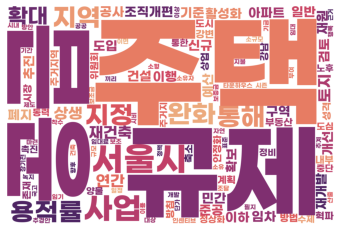

In [12]:
#5. 주요 키워드 추출 워드클라우드
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='./GmarketSansTTFBold.ttf',background_color='white',
                     colormap='flare', width=1500, height=1000).generate_from_frequencies(data)
plt.imshow(wordcloud)
plt.axis('off')

### 주택, 공급(확대), 규제(완화) 등의 키워드를 확인할 수 있음

# 결론


## 후보자의 공약 주제를 한줄에 출력하여 어떤 분야에 집중하는 지 한눈에 보기 쉽다

### 잘된점 

코드정보, 후보자정보를 거쳐야 선거공약 데이터 추출
- 공공데이터 '코드정보' / 선거아이디, 선거명 -> 공공데이터 '후보자정보' / 후보아이디, 선거종류코드 -> 공공데이터 '선거공약' / 선거공약

### 보완할점

- 후보자 이름으로 후보자 공약 찾을 수 있도록 수정




## (**질문 있으시면 정현B에게 해주세요!**)